In [ ]:
!git clone https://github.com/juankchb/Sistemas-Inteligentes.git

fatal: destination path 'Sistemas-Inteligentes' already exists and is not an empty directory.


In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/Sistemas-Inteligentes/data/MTA_Bus_Service_Delivered__Beginning_2020_20240311.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28491 entries, 0 to 28490
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      28491 non-null  object 
 1   borough                    28491 non-null  object 
 2   day_type                   28491 non-null  int64  
 3   trip_type                  28491 non-null  object 
 4   route_id                   28491 non-null  object 
 5   period                     28491 non-null  object 
 6   actual_number_of_buses     28491 non-null  int64  
 7   scheduled_number_of_buses  28491 non-null  int64  
 8   service_delivered          28491 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB


In [ ]:
dataset.describe()

,day_type,actual_number_of_buses,scheduled_number_of_buses,service_delivered
count,28491.000000,28491.000000,28491.000000,28491.000000
mean,1.442069,895.934049,941.190376,0.957077
std,0.496641,9415.185151,9913.967830,0.051763
min,1.000000,0.000000,2.000000,0.000000
25%,1.000000,161.000000,168.000000,0.934659
50%,1.000000,326.000000,340.000000,0.965398
75%,2.000000,622.000000,653.000000,0.988889
max,2.000000,410399.000000,433468.000000,1.253968


In [ ]:
nullrowsid = dataset.isnull().sum()
nullrowsid

month                        0
borough                      0
day_type                     0
trip_type                    0
route_id                     0
period                       0
actual_number_of_buses       0
scheduled_number_of_buses    0
service_delivered            0
dtype: int64

In [ ]:
dataset_sin_duplicados = dataset.drop_duplicates(keep='first')

In [ ]:
print(dataset.shape)
print(dataset_sin_duplicados.shape)
print(dataset.duplicated().sum())

(28491, 9)
(28491, 9)
0


In [ ]:
dataset = dataset.dropna()

dataset['month'] = pd.to_datetime(dataset['month'])
dataset['day_type'] = dataset['day_type'].astype('category')
dataset['trip_type'] = dataset['trip_type'].astype('category')

In [ ]:
dataset['borough'].value_counts()

borough
Queens           9309
Brooklyn         6107
Bronx            5327
Manhattan        3904
Staten Island    3746
Systemwide         98
Name: count, dtype: int64

In [ ]:
df_filtrado = dataset[~dataset['borough'].str.contains('Systemwide')]

In [ ]:
df_filtrado=df_filtrado.drop(columns=['period'])

In [ ]:
df_filtrado=df_filtrado.drop(columns=['scheduled_number_of_buses'])

In [ ]:
df_filtrado = df_filtrado.sort_values(by='month')
filas_a_mantener = df_filtrado.groupby('month').size() // 2

def guardar_mitad(dataset):
    mitad = filas_a_mantener[dataset['month'].iloc[0]]
    return dataset.head(mitad)

# Aplicar la función a cada grupo y concatenar los resultados
df_resultado = df_filtrado.groupby('month', group_keys=False).apply(guardar_mitad)

In [ ]:
df_resultado

,month,borough,day_type,trip_type,route_id,actual_number_of_buses,service_delivered
0,2020-01-01,Bronx,1,LCL/LTD,BX1,948,0.957576
383,2020-01-01,Queens,2,LCL/LTD,Q32,236,0.975207
384,2020-01-01,Queens,1,LCL/LTD,Q33,975,0.990854
385,2020-01-01,Queens,2,LCL/LTD,Q33,175,0.988701
386,2020-01-01,Queens,1,LCL/LTD,Q34,602,0.970968
...,...,...,...,...,...,...,...
28393,2024-01-01,Queens,1,EXP,QM44,181,0.932990
28394,2024-01-01,Queens,1,EXP,QM5,497,0.937736
28378,2024-01-01,Queens,1,EXP,QM2,445,0.952891
28194,2024-01-01,Manhattan,2,LCL/LTD,M7,266,0.992537


In [ ]:
df_resultado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14174 entries, 0 to 28047
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month                   14174 non-null  datetime64[ns]
 1   borough                 14174 non-null  object        
 2   day_type                14174 non-null  category      
 3   trip_type               14174 non-null  category      
 4   route_id                14174 non-null  object        
 5   actual_number_of_buses  14174 non-null  int64         
 6   service_delivered       14174 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 692.4+ KB


In [ ]:
set_datos =dataset['borough' ].head()
for i in set_datos:
  print(i)

Bronx
Bronx
Bronx
Bronx
Bronx


In [ ]:
dataset.columns


Index(['month', 'borough', 'day_type', 'trip_type', 'route_id', 'period',
       'actual_number_of_buses', 'scheduled_number_of_buses',
       'service_delivered'],
      dtype='object')

In [ ]:
# Definir una clase para representar los nodos del grafo
class Node:
    def __init__(self, borough):
        self.borough = borough

# Definir una clase para representar las aristas del grafo
class Edge:
    def __init__(self, origen, destino, peso, capacidad):
        self.origen = origen
        self.destino = destino
        self.peso = peso
        self.capacidad = capacidad  # Agregar el atributo capacidad

# Datos de ejemplo
data = [
    {'origen': 'Manhattan', 'destino': 'Brooklyn', 'distancia': 10, 'capacidad': 100},
    {'origen': 'Brooklyn', 'destino': 'Queens', 'distancia': 15, 'capacidad': 150},
    # Añade más datos según tu dataset
]

# Crear nodos y aristas
nodos = set()
aristas = []

for row in data:
    origen = Node(row['origen'])
    destino = Node(row['destino'])
    peso = row['distancia']  # Peso de la arista basado en la distancia (podría ser otro criterio)
    capacidad = row['capacidad']  # Capacidad de transporte en la ruta
    nodos.add(origen)
    nodos.add(destino)
    aristas.append(Edge(origen, destino, peso, capacidad))  # Agregar la capacidad en la inicialización de la arista

# Visualización de nodos y aristas
print("Nodos:")
for node in nodos:
    print(node.borough)

print("\nAristas:")
for edge in aristas:
    print(f"Origen: {edge.origen.borough}, Destino: {edge.destino.borough}, Peso: {edge.peso}, Capacidad: {edge.capacidad}")


Nodos:
Brooklyn
Manhattan
Brooklyn
Queens

Aristas:
Origen: Manhattan, Destino: Brooklyn, Peso: 10, Capacidad: 100
Origen: Brooklyn, Destino: Queens, Peso: 15, Capacidad: 150


Ruta óptima encontrada:
Manhattan -> Queens


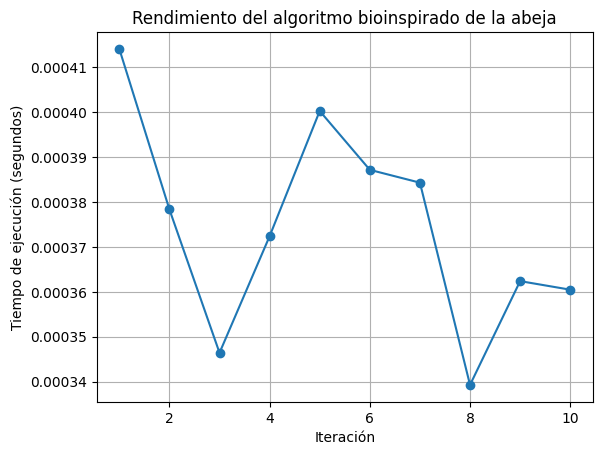

In [ ]:
import random

# Función para simular el comportamiento del algoritmo bioinspirado de la abeja
def algoritmo_bioinspirado_abeja(grafo, origen, destino, capacidad_maxima):
    mejor_ruta = None
    mejor_peso = float('inf')  # Inicializar con un valor infinito

    # Simular la búsqueda de rutas por parte de las abejas
    for i in range(100):  # Número de iteraciones (puedes ajustarlo según tu preferencia)
        # Simular el movimiento de una abeja exploradora
        nodo_actual = origen
        ruta_actual = [nodo_actual]
        capacidad_usada = 0
        while nodo_actual != destino:
            vecinos = grafo.get(nodo_actual, {})  # Obtener los vecinos del nodo actual
            if not vecinos:  # Verificar si hay vecinos
                break
            vecino_siguiente = random.choice(list(vecinos.keys()))  # Elegir aleatoriamente un vecino
            ruta_actual.append(vecino_siguiente)
            capacidad_usada += vecinos[vecino_siguiente]['capacidad']
            nodo_actual = vecino_siguiente

            # Si se excede la capacidad máxima, abandonar la ruta actual
            if capacidad_usada > capacidad_maxima:
                ruta_actual = None
                break

        # Si se encontró una ruta válida y es mejor que la mejor ruta actual, actualizar
        if ruta_actual and grafo.get(origen, {}).get(ruta_actual[-1], {}).get('peso', float('inf')) < mejor_peso:
            mejor_ruta = ruta_actual
            mejor_peso = grafo[origen][ruta_actual[-1]]['peso']

    return mejor_ruta

# Definir el grafo (usando un diccionario para simularlo)
grafo = {
    'Manhattan': {'Brooklyn': {'peso': 10, 'capacidad': 100}, 'Queens': {'peso': 20, 'capacidad': 150}},
    'Brooklyn': {'Manhattan': {'peso': 10, 'capacidad': 100}, 'Queens': {'peso': 15, 'capacidad': 150}},
    'Queens': {'Manhattan': {'peso': 20, 'capacidad': 150}, 'Brooklyn': {'peso': 15, 'capacidad': 150}}
}

# Definir el nodo de origen y destino
origen = 'Manhattan'
destino = 'Queens'

# Capacidad máxima de la ruta
capacidad_maxima = 200

# Ejecutar el algoritmo bioinspirado de la abeja
ruta_optima = algoritmo_bioinspirado_abeja(grafo, origen, destino, capacidad_maxima)

# Imprimir la ruta óptima encontrada
if ruta_optima:
    print("Ruta óptima encontrada:")
    print(" -> ".join(ruta_optima))
else:
    print("No se encontró ninguna ruta válida dentro de la capacidad máxima.")
import time
import matplotlib.pyplot as plt

# Función para medir el rendimiento del algoritmo y visualizarlo
def medir_rendimiento(grafo, origen, destino, capacidad_maxima, num_iteraciones):
    tiempos = []
    for _ in range(num_iteraciones):
        inicio = time.time()
        ruta_optima = algoritmo_bioinspirado_abeja(grafo, origen, destino, capacidad_maxima)
        fin = time.time()
        tiempo_ejecucion = fin - inicio
        tiempos.append(tiempo_ejecucion)

    # Visualizar los tiempos de ejecución
    plt.plot(range(1, num_iteraciones + 1), tiempos, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('Rendimiento del algoritmo bioinspirado de la abeja')
    plt.grid(True)
    plt.show()

# Definir parámetros
num_iteraciones = 10  # Número de iteraciones para medir el rendimiento

# Ejecutar y visualizar el rendimiento del algoritmo
medir_rendimiento(grafo, origen, destino, capacidad_maxima, num_iteraciones)
